# Machine Learning 1 - Group Project 
## Group 4
Diego Gaitan <br>
Romain Gerlain <br>
Juan José Rincón <br>
Cecile Tambey<br>
Luka Tcheishvili<br>

This notebook is organized in the following sections:

* [Step 0 - Import packages and dataset](#0)
* [Step 1 - Exploratory Data Analysis (EDA)](#1)
    
    * [Step 1.1 - Identification of missing values and their possible meaning](#11) 
    * [Step 1.2 - Missing values handling](#12) 
    * [Step 1.3 - Outliers handling](#13) 
    * [Step 1.4 - Redundancy analysis](#14) 
* [Step 2 - Segmentation](#2)


<a id='0'></a>
## Import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import os
import sklearn

In [2]:
os.chdir('/Users/juanjose/Library/CloudStorage/GoogleDrive-jj.rincon@student.ie.edu/My Drive/term 2/ML 1/group assignment/IE-MBDS-ML-1-group-project')

In [3]:
df = pd.read_excel("data/Houses for rent in Madrid.xlsx")
df.head()

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,1,Ciudad Lineal,Piso en Quintana,NaN,Quintana,1300,2.0,72,3.0,1.0,1.0,0,0,0,0
1,2,Ciudad Lineal,Piso en calle de Arturo Soria,NaN,Costillares,3000,5.0,260,2.0,1.0,1.0,0,0,0,0
2,3,Ciudad Lineal,Piso en calle de Vicente Muzas,4,Colina,1300,2.0,100,3.0,1.0,1.0,0,0,0,0
3,4,Ciudad Lineal,Piso en calle Badajoz,NaN,San Pascual,1600,3.0,120,4.0,1.0,1.0,0,0,0,0
4,5,Ciudad Lineal,Piso en calle de Nuestra Señora del Villar,9,Ventas,800,2.0,60,3.0,1.0,0.0,0,0,0,0


<a id='1'></a>
# Exploratory Data Analysis (EDA)

In the Address column you have the rent description with the type of real estate ('piso','chalet','estudio',etc.) and the address where it is located, we could split the column to get a type column separated from the address.

In [4]:
df = df.rename(columns={'Address':'Description'})
df[['type', 'Address']] = df['Description'].str.split(' en ', n=1, expand=True)
df

,Id,District,Description,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,type,Address
0,1,Ciudad Lineal,Piso en Quintana,NaN,Quintana,1300,2.0,72,3.0,1.0,1.0,0,0,0,0,Piso,Quintana
1,2,Ciudad Lineal,Piso en calle de Arturo Soria,NaN,Costillares,3000,5.0,260,2.0,1.0,1.0,0,0,0,0,Piso,calle de Arturo Soria
2,3,Ciudad Lineal,Piso en calle de Vicente Muzas,4,Colina,1300,2.0,100,3.0,1.0,1.0,0,0,0,0,Piso,calle de Vicente Muzas
3,4,Ciudad Lineal,Piso en calle Badajoz,NaN,San Pascual,1600,3.0,120,4.0,1.0,1.0,0,0,0,0,Piso,calle Badajoz
4,5,Ciudad Lineal,Piso en calle de Nuestra Señora del Villar,9,Ventas,800,2.0,60,3.0,1.0,0.0,0,0,0,0,Piso,calle de Nuestra Señora del Villar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,2184,Vicálvaro,Piso en calle Villajoyosa,99,Los Rosales,1100,3.0,70,3.0,1.0,1.0,0,0,0,0,Piso,calle Villajoyosa
2085,2185,Vicálvaro,Piso en Los Ángeles,NaN,Los Ángeles,670,2.0,61,NaN,0.0,0.0,0,0,0,0,Piso,Los Ángeles
2086,2186,Vicálvaro,Piso en San Andrés,NaN,San Andrés,450,1.0,45,NaN,0.0,0.0,0,0,0,0,Piso,San Andrés
2087,2187,Vicálvaro,Piso en calle del Doctor MartÃ­n ArÃ©valo,35,San Andrés,750,2.0,92,0.0,1.0,1.0,0,0,0,0,Piso,calle del Doctor MartÃ­n ArÃ©valo


In [5]:
df[['type','Cottage','Duplex','Penthouse']].value_counts()

type                         Cottage  Duplex  Penthouse
Piso                         0        0       0            1675
Ático                        0        0       1             169
Estudio                      0        0       0              92
Dúplex                       0        1       0              64
Casa o chalet independiente  1        0       0              36
Chalet adosado               1        0       0              27
Chalet pareado               1        0       0              19
Chalet                       1        0       0               5
Caserón                      1        0       0               1
Chalet adosado               0        0       0               1
Name: count, dtype: int64

it seams that there is one real state that is categorized as being in a building (no Cottage) but its description is from a Chalet adosado. The inspection of that row shows that the categorization has done wrongly so we change the Cottage value to 1. 

In [6]:
df.loc[(df['type']=='Chalet adosado')&(df['Cottage']==0)]

,Id,District,Description,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,type,Address
1805,1888,San Blás,Chalet adosado en Rejas,NaN,Rejas,1600,3.0,220,0.0,0.0,0.0,0,0,0,0,Chalet adosado,Rejas


In [7]:
df.loc[(df['type']=='Chalet adosado')&(df['Cottage']==0),'Cottage'] = 1

All no cottage real state are categorized bewteen Duplex and Penthouse, but it is also missing a possible category, Studio (all in one space). we create this category as a variable. 

In [8]:
df['Studio'] = np.where(df['type']=='Estudio',1,0)

In [9]:
df[['type','Cottage','Duplex','Penthouse','Studio']].value_counts()

type                         Cottage  Duplex  Penthouse  Studio
Piso                         0        0       0          0         1675
Ático                        0        0       1          0          169
Estudio                      0        0       0          1           92
Dúplex                       0        1       0          0           64
Casa o chalet independiente  1        0       0          0           36
Chalet adosado               1        0       0          0           28
Chalet pareado               1        0       0          0           19
Chalet                       1        0       0          0            5
Caserón                      1        0       0          0            1
Name: count, dtype: int64

From the cottage real state, there are someones that are 'adosado' which mean the cottage are semi detached, are not completely independent from another real state. Though, some of the real state types records are wrongly categorized, like 'Chalet pareado' and 'chalet adosado' should be a cottage semidetached, also a 'Chalet' should not be semidetached.  

In [10]:
df[['type','Cottage','Semidetached']].value_counts()

type                         Cottage  Semidetached
Piso                         0        0               1675
Ático                        0        0                169
Estudio                      0        0                 92
Dúplex                       0        0                 64
Casa o chalet independiente  1        0                 36
Chalet adosado               1        1                 27
Chalet pareado               1        0                 19
Chalet                       1        0                  4
Caserón                      1        0                  1
Chalet                       1        1                  1
Chalet adosado               1        0                  1
Name: count, dtype: int64

In [11]:
df.loc[(df['type']=='Chalet pareado')&(df['Cottage']==1),'Semidetached'] = 1

df.loc[(df['type']=='Chalet adosado')&(df['Cottage']==1),'Semidetached'] = 1

df.loc[(df['type']=='Chalet')&(df['Cottage']==1)&(df['Semidetached']==1),'Semidetached'] = 0


In [12]:
df[['type','Cottage','Semidetached']].value_counts()

type                         Cottage  Semidetached
Piso                         0        0               1675
Ático                        0        0                169
Estudio                      0        0                 92
Dúplex                       0        0                 64
Casa o chalet independiente  1        0                 36
Chalet adosado               1        1                 28
Chalet pareado               1        1                 19
Chalet                       1        0                  5
Caserón                      1        0                  1
Name: count, dtype: int64

<a id='11'></a>
### Identification of missing values and their possible meaning

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2089 non-null   int64  
 1   District      2089 non-null   object 
 2   Description   2089 non-null   object 
 3   Number        747 non-null    object 
 4   Area          2085 non-null   object 
 5   Rent          2089 non-null   int64  
 6   Bedrooms      2000 non-null   float64
 7   Sq.Mt         2089 non-null   int64  
 8   Floor         1948 non-null   float64
 9   Outer         1927 non-null   float64
 10  Elevator      1956 non-null   float64
 11  Penthouse     2089 non-null   int64  
 12  Cottage       2089 non-null   int64  
 13  Duplex        2089 non-null   int64  
 14  Semidetached  2089 non-null   int64  
 15  type          2089 non-null   object 
 16  Address       2089 non-null   object 
 17  Studio        2089 non-null   int64  
dtypes: float64(4), int64(8), obj

In [14]:
pd.DataFrame({
    'Nan count': df.isna().sum(),
    'Nan %': df.isna().mean() * 100
})

,Nan count,Nan %
Id,0,0.000000
District,0,0.000000
Description,0,0.000000
Number,1342,64.241264
Area,4,0.191479
Rent,0,0.000000
Bedrooms,89,4.260412
Sq.Mt,0,0.000000
Floor,141,6.749641
Outer,162,7.754907


From the columns with Nan values, Number is the one that has the most, 1342 (64%). This column identifies the street number of the address, which is not required in our model. Additionally, since there is no point in trying to handle all those missing values, this column will be droped from the dataset

Lets inspect the Bedrooms missing values: <br> 
From the 89 rows that has missing values in Bedrooms, out of the 82 are of type 'Studio', only a few are 'Penthouse' (5) and 'Duplex' (2). <br> 
We could see that from the 92 records of type 'Studio' 82 of them are the ones that have Nan in Bedrooms, the other 10 records Bedrooms value is 0. so we could replace the Nan with 0, which makes sense with the business, a 'Estudio' is a real estate that does not have a bedroom per se, but has a all in one space. 

In [15]:
df.loc[df['Bedrooms'].isna(),['Cottage','Semidetached','Duplex','Penthouse','Studio']].value_counts()

Cottage  Semidetached  Duplex  Penthouse  Studio
0        0             0       0          1         82
                               1          0          5
                       1       0          0          2
Name: count, dtype: int64

In [16]:
pd.DataFrame({
    'total count': [len(df.loc[(df['type'].isin(['Estudio']))])],
    'Nan count': [len(df.loc[(df['type'].isin(['Estudio']))&(df['Bedrooms'].isna())])],
    'Nan %': [( len(df.loc[(df['type'].isin(['Estudio']))&(df['Bedrooms'].isna())]) ) / ( len(df.loc[(df['type'].isin(['Estudio']))]) ) * 100]
})

,total count,Nan count,Nan %
0,92,82,89.130435


In [17]:
df.loc[(df['type'].isin(['Estudio']))&(~df['Bedrooms'].isna()),'Bedrooms'].unique()

array([0.])

Floor: The floor has 141 Nan values, out of which 84 (60%) are Cottage, which are not located in any particular floor number, so they could be categorized to have floor 0 (basement). 

Elevator: There are 133 records that have Nan values in. 85 are from a cottage, which usually dont have elevator. we could categorized those Nan as elevator = 0.

In [18]:
df.loc[df['Floor'].isna(),['Cottage']].value_counts()

Cottage
1          84
0          57
Name: count, dtype: int64

In [19]:
df.loc[df['Elevator'].isna(),['Cottage']].value_counts()

Cottage
1          85
0          48
Name: count, dtype: int64

The Outer column identifies the real state that have sight (and enter) to the outside of the building, while the ones that are Outer==0, have sight (and enter) within the inside of the building. The data, and also by definition, there are no cottages that are identified as Outer==1. So in this sense, the records that has Nan values in Outer and are cottages (85/162) could be re stated to have a valuo of 0 in Outer column. There is no clear rule or definition for the other real states.

In [20]:
df.loc[(df['Outer']==1),['Cottage','Semidetached','Duplex','Penthouse','Studio']].value_counts()

Cottage  Semidetached  Duplex  Penthouse  Studio
0        0             0       0          0         1394
                               1          0          157
                               0          1           62
                       1       0          0           58
Name: count, dtype: int64

In [21]:
df.loc[df['Outer'].isna(),['Cottage','Semidetached']].value_counts()

Cottage  Semidetached
0        0               77
1        1               44
         0               41
Name: count, dtype: int64

In [22]:
df.loc[(df['Outer']==0),['Cottage','Semidetached','Duplex','Penthouse','Studio']].value_counts()

Cottage  Semidetached  Duplex  Penthouse  Studio
0        0             0       0          0         211
                                          1          28
                               1          0           7
                       1       0          0           6
1        1             0       0          0           3
         0             0       0          0           1
Name: count, dtype: int64

<a id='12'></a>
### Missing values handling

General missing values handling: drop Number column as it is non informative. drop the only 4 records that has missing values in Area column (neighborhood identifier).

In [23]:
df = df.drop(columns=['Number'])
df = df.dropna(subset=["Area"])

Replace missing values for Bendrooms, Floor, Elevator, Outer with the rules discussed above

In [24]:
df.loc[(df['Studio']==1)&(df['Bedrooms'].isna()),'Bedrooms'] = 0.0
df.loc[(df['Cottage']==1)&(df['Floor'].isna()),'Floor'] = 0
df.loc[(df['Cottage']==1)&(df['Elevator'].isna()),'Elevator'] = 0
df.loc[(df['Cottage']==1)&(df['Outer'].isna()),'Outer'] = 0


Verifiy the context of the left Nan values in Bedrooms

In [25]:
df.loc[df['Bedrooms'].isna(),['Cottage','Semidetached','Studio','Duplex','Penthouse']].value_counts()

Cottage  Semidetached  Studio  Duplex  Penthouse
0        0             0       0       1            5
                               1       0            2
Name: count, dtype: int64

Drop the 7 left records with Nan in Bedrooms.

In [26]:
df = df.dropna(subset=["Bedrooms"])

Verifiy the context of the left Nan values in Floor

In [27]:
df.loc[df['Floor'].isna(),['Cottage','Semidetached','Duplex','Penthouse','Studio']].value_counts()

Cottage  Semidetached  Duplex  Penthouse  Studio
0        0             0       0          0         53
                                          1          4
Name: count, dtype: int64

In [28]:
df.loc[df['Floor'].isna(),['District','Area','Rent','Bedrooms','Sq.Mt','Floor','Outer','Elevator']]

,District,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator
61,Ciudad Lineal,Concepción,1235,3.0,122,NaN,NaN,NaN
62,Ciudad Lineal,Concepción,1235,3.0,122,NaN,NaN,NaN
82,Ciudad Lineal,Concepción,845,1.0,77,NaN,NaN,NaN
152,Fuencarral,Fuentelarreina,2400,4.0,219,NaN,NaN,NaN
198,Fuencarral,Montecarmelo,1350,3.0,116,NaN,NaN,1.0
199,Fuencarral,Montecarmelo,1175,2.0,83,NaN,NaN,1.0
288,Hortaleza,Canillas,600,1.0,60,NaN,NaN,NaN
322,Hortaleza,Canillas,1200,3.0,109,NaN,NaN,NaN
338,Latina,Puerta del Ángel,790,2.0,87,NaN,NaN,0.0
360,Latina,Aluche,840,3.0,67,NaN,NaN,NaN


Drop the 57 left records with Nan in Floor (57/2078, 2.8%), there is no way to know how to input these values without any major assumption, and indeed most of these records has also Nan values in Elavator and Outer

In [29]:
df = df.dropna(subset=["Floor"])

Verifiy the context of the left Nan values in Elevator

In [30]:
df.loc[df['Elevator'].isna(),['Cottage','Semidetached','Duplex','Penthouse','Studio']].value_counts()

Cottage  Semidetached  Duplex  Penthouse  Studio
0        0             0       0          0         20
                               1          0          1
Name: count, dtype: int64

In [31]:
df.loc[df['Elevator'].isna(),['District','Area','Rent','Bedrooms','Sq.Mt','Floor','Outer','Elevator']]

,District,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator
219,Hortaleza,Conde Orgaz-Piovera,3300,5.0,234,2.0,1.0,NaN
299,Hortaleza,Sanchinarro,900,1.0,64,5.0,NaN,NaN
352,Latina,Los Cármenes,700,2.0,60,3.0,NaN,NaN
508,Moncloa,Aravaca,3500,5.0,250,1.0,NaN,NaN
547,Puente Vallecas,Numancia,650,2.0,55,1.0,NaN,NaN
552,Puente Vallecas,San Diego,800,2.0,80,1.0,NaN,NaN
596,Retiro,Niño JesÁºs,1500,3.0,95,1.0,NaN,NaN
675,Salamanca,Goya,3500,2.0,110,5.0,NaN,NaN
711,Salamanca,Guindalera,950,1.0,50,2.0,NaN,NaN
931,Salamanca,Goya,1370,1.0,50,0.5,1.0,NaN


Drop the 21 left records with Nan in Elavator (21/2021, 1%), there is no way to know how to input these values without any major assumption, and indeed most of these records has also Nan values in Outer

In [32]:
df = df.dropna(subset=["Elevator"])

Verifiy the context of the left Nan values in Outer

In [33]:
df.loc[df['Outer'].isna(),['Cottage','Semidetached','Duplex','Penthouse','Studio']].value_counts()

Cottage  Semidetached  Duplex  Penthouse  Studio
0        0             0       0          0         16
                               1          0          4
Name: count, dtype: int64

In [34]:
df.loc[df['Outer'].isna(),['District','Area','Rent','Bedrooms','Sq.Mt','Floor','Outer','Elevator']]

,District,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator
140,Fuencarral,Pilar,900,3.0,80,8.0,NaN,1.0
290,Hortaleza,Valdebebas - Valdefuentes,1600,4.0,94,4.0,NaN,1.0
358,Latina,Águilas,780,3.0,82,0.0,NaN,1.0
553,Puente Vallecas,Palomeras Bajas,1175,3.0,50,2.0,NaN,0.0
668,Salamanca,Recoletos,1300,1.0,69,6.0,NaN,1.0
683,Salamanca,Lista,1200,1.0,52,4.0,NaN,0.0
749,Salamanca,Castellana,2750,2.0,150,7.0,NaN,1.0
1099,Centro,Lavapiés-Embajadores,850,2.0,52,1.0,NaN,1.0
1220,Centro,Palacio,2800,5.0,160,5.0,NaN,1.0
1260,Centro,Palacio,3400,3.0,250,2.0,NaN,1.0


Drop the 20 left records with Nan in Outer (20/2000, 1%), there is no way to know how to input these values without any major assumption, they are non informative.

In [35]:
df = df.dropna(subset=["Outer"])

In [36]:
pd.DataFrame({
    'Nan count': df.isna().sum(),
    'Nan %': df.isna().mean() * 100
})

,Nan count,Nan %
Id,0,0.0
District,0,0.0
Description,0,0.0
Area,0,0.0
Rent,0,0.0
Bedrooms,0,0.0
Sq.Mt,0,0.0
Floor,0,0.0
Outer,0,0.0
Elevator,0,0.0


<a id='13'></a>
### Outliers handling

Lets inspect the possible outliers for cottage real state. its importante to inspect cottage deifferent that builing flats due to the structure difference in floors, sq meters, rooms, where usually cottages have higher values, of bedrooms, and sq meters, but floor should be 0.

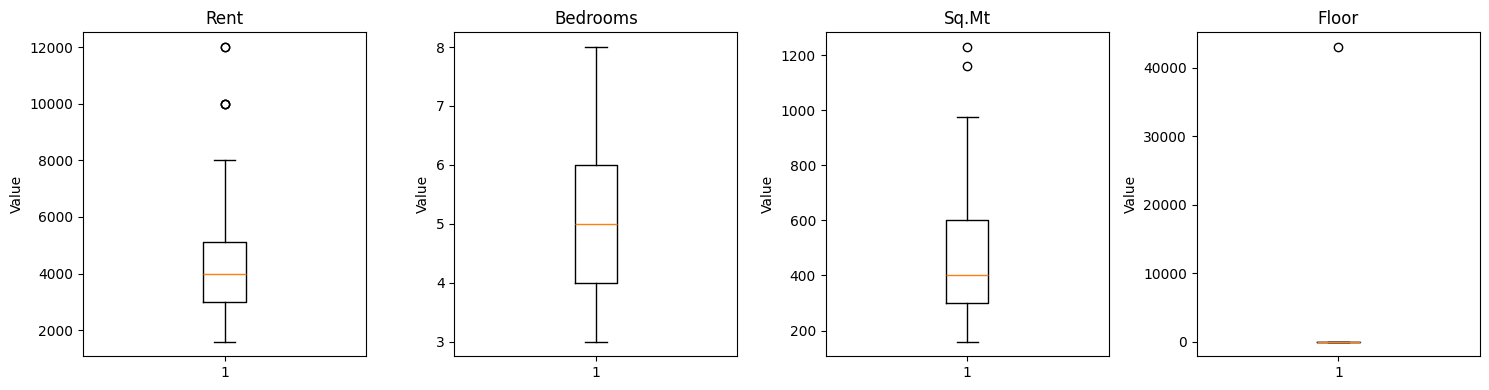

In [37]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each numerical column 
numerical_cols = ['Rent','Bedrooms', 'Sq.Mt', 'Floor']
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 4))

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df.loc[df['Cottage']==1,col])
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

inspect the cottage with a floor greater than 0. it seams like an data entry error in that column (43039, maybe the zip code). it just could be clamped to 0. 

In [38]:
df.loc[(df['Floor']>=1)&(df['Cottage']==1)]

,Id,District,Description,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,type,Address,Studio
1418,1485,Chamartín,Chalet adosado en El Viso,en El Viso,7500,5.0,310,43039.0,0.0,0.0,0,1,0,1,Chalet adosado,El Viso,0


In [39]:
df.loc[(df['Floor']>=1)&(df['Cottage']==1),'Floor'] = 0

Inspect the cottage with a sq meters greater than 1000, percentile 90%. It seams like those showed not the build area, but the whole land area size, which is not what we are using to measure real state, so we could drop these ones. 

In [40]:
df.loc[(df['Sq.Mt']>=1000)&(df['Cottage']==1)]

,Id,District,Description,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,type,Address,Studio
408,430,Moncloa,Casa o chalet independiente en Valdemarín,Valdemarín,8000,6.0,1160,0.0,0.0,0.0,0,1,0,0,Casa o chalet independiente,Valdemarín,0
410,432,Moncloa,Casa o chalet independiente en Ciudad Universi...,Ciudad Universitaria,12000,7.0,1230,0.0,0.0,0.0,0,1,0,0,Casa o chalet independiente,Ciudad Universitaria,0


In [41]:
df = df.loc[~((df['Sq.Mt']>=1000)&(df['Cottage']==1))]

Lets inspect the possible outliers for non cottage real state. <br> 
Floor usual values are between 0-10 and have some values above the percentile 90% until 30 floor, which is possible, to have real state in building up to 30 floors in madrid. <br>
Sqt meters usual values are between 0-250 and have some values above the percentile 90% until 600 sqt meters. It seams intuitive to have flats between 0-250 meters, and some greater than 250 until 600 that could be the 'old big' flats. though, there is a flat with more than 1200 sq meters which doesnt makes much sense, we should inspect this one, to drop it or change its value.  

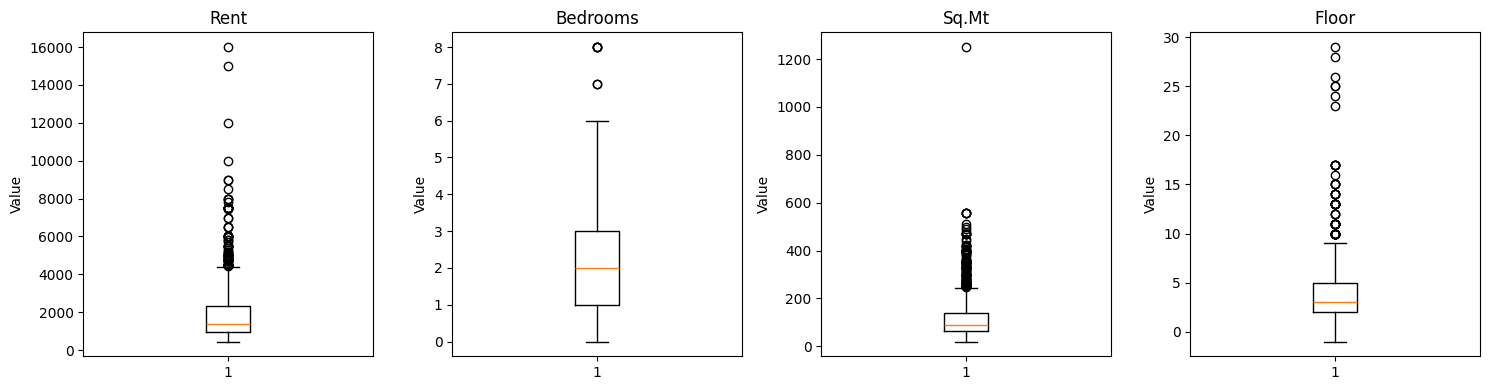

In [42]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each numerical column 
numerical_cols = ['Rent','Bedrooms', 'Sq.Mt', 'Floor']
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 4))

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df.loc[df['Cottage']==0,col])
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [43]:
df.loc[(df['Sq.Mt']>=1000)&(df['Cottage']==0)]

,Id,District,Description,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,type,Address,Studio
1757,1836,Chamberí,Piso en Almagro,Almagro,15000,8.0,1250,4.0,1.0,1.0,0,0,0,0,Piso,Almagro,0


<a id='14'></a>

## Redundancy analyisis

In [50]:
X_cols = ['Bedrooms', 'Sq.Mt', 'Floor', 'Outer', 'Elevator', 'Penthouse', 'Cottage', 'Duplex','Semidetached', 'Studio']


<Axes: >

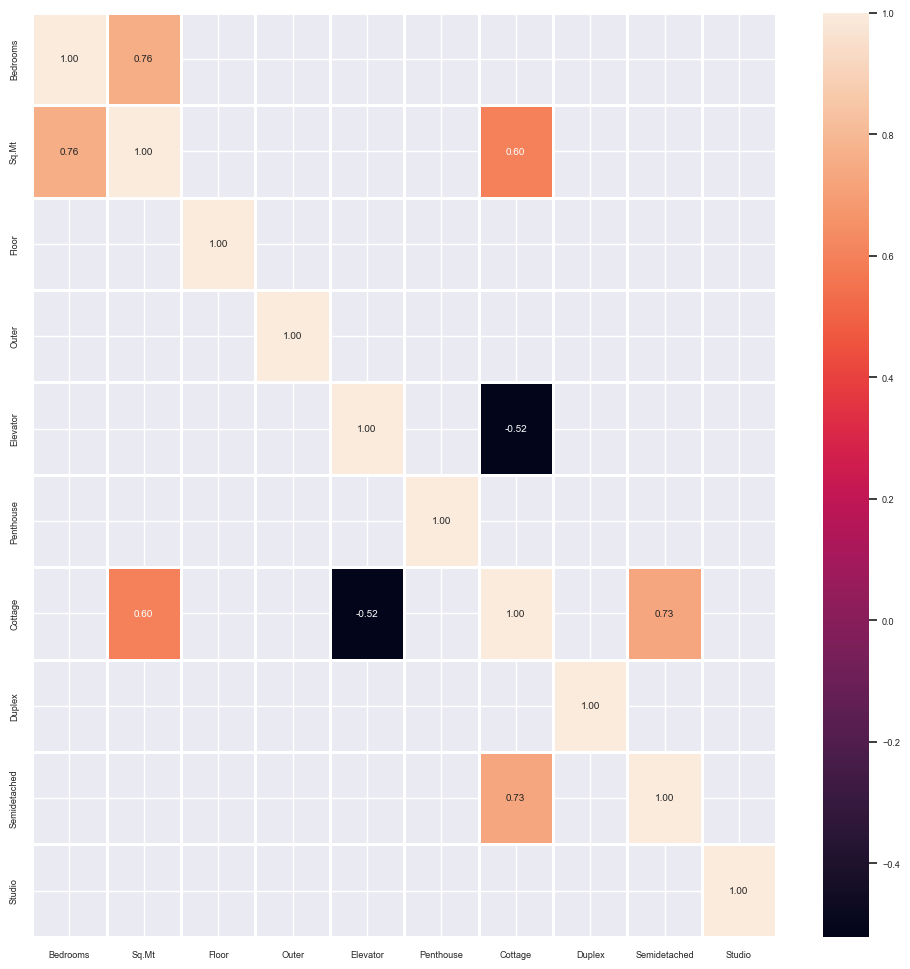

In [53]:
import seaborn as sns

X = df[X_cols]
corr_matrix = X.corr()
high_corr = corr_matrix[abs(corr_matrix) > 0.5]
sns.set(font_scale=0.6)

# Show now only pairs with an absolute correlation value above 0.4
fig, ax = plt.subplots(figsize=(12,12))         
sns.heatmap(high_corr, annot=True, fmt=".2f", linewidths=1, ax=ax)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["type", "district"]

encoder = OneHotEncoder(sparse_output=False, drop=None)

encoded = encoder.fit_transform(df[categorical_cols])

<a id='2'></a>
# Segementation

Scaling variables

In [56]:
df_x = df[X_cols]

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # we will use 0-1 normalization
scaler.set_output(transform="pandas")
x_scaled = scaler.fit_transform(df_x)

df_x_scaled = df_x.copy() 
df_x_scaled.update(x_scaled) # this replaces the numeric variables by their normalized version
df_x_scaled.head() # X_df is the new dataframe re-scaled

/var/folders/dz/mp6v9x4n2y30h186jvh_7lh40000gn/T/ipykernel_2008/4205176817.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.04227642 0.19512195 0.06504065 ... 0.04065041 0.05853659 0.14634146]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_x_scaled.update(x_scaled) # this replaces the numeric variables by their normalized version


,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Studio
0,0.250,0.042276,0.133333,1.0,1.0,0,0,0,0,0
1,0.625,0.195122,0.100000,1.0,1.0,0,0,0,0,0
2,0.250,0.065041,0.133333,1.0,1.0,0,0,0,0,0
3,0.375,0.081301,0.166667,1.0,1.0,0,0,0,0,0
4,0.250,0.032520,0.133333,1.0,0.0,0,0,0,0,0


K-means 

In [87]:
from sklearn.cluster import KMeans
import numpy as np


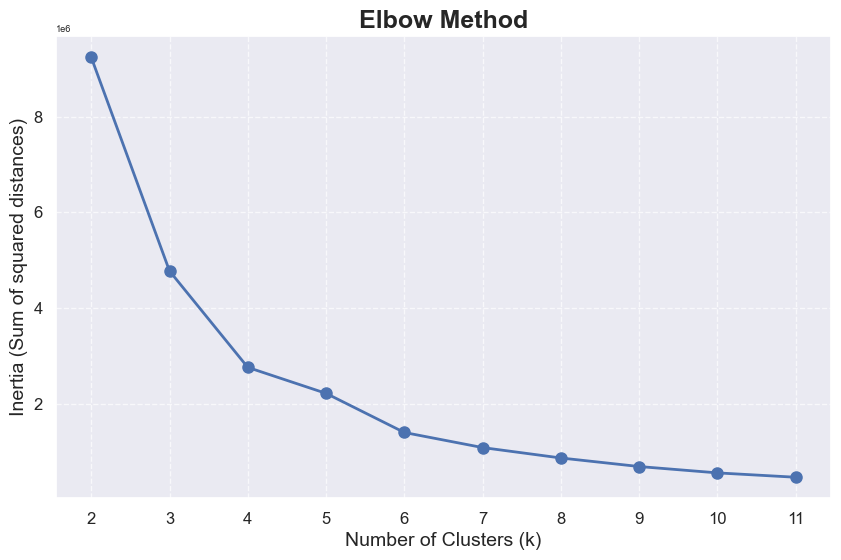

In [88]:

k_range = range(2, 12)  
inertias = []

for k in k_range:
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_x)
    labels = kmeans.predict(df_x)
    #df_x['labels'] = labels
    centroids = kmeans.cluster_centers_
    # Inertia calculation

    inertia = sum(
        #np.sum(np.linalg.norm(df_x.loc[df_x['labels'] == i] - centroids[i], axis=1)**2)
        np.sum(np.linalg.norm(df_x[labels == i] - centroids[i], axis=1)**2)
        for i in range(k)
    )
    inertias.append(inertia)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-', markersize=8, linewidth=2)
plt.title('Elbow Method', fontsize=18, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia (Sum of squared distances)', fontsize=14)
plt.xticks(k_range, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Guardar o mostrar
plt.savefig('elbow_chart.png')

In [89]:
k = 6

kmeans = KMeans(n_clusters=k)
kmeans.fit(df_x)
labels = kmeans.predict(df_x)
df['cluster'] = labels

In [79]:
df.loc[df.cluster==0].describe()

,Id,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Studio,cluster
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,1031.0,1031.000000,1031.0,1031.000000,1031.0
mean,1200.640155,1161.578080,1.529583,66.712900,3.193986,0.801164,0.822502,0.050436,0.0,0.019399,0.0,0.084384,0.0
std,638.242462,521.942021,0.814223,16.748077,3.055745,0.399318,0.382275,0.218950,0.0,0.137988,0.0,0.278098,0.0
min,1.000000,450.000000,0.000000,20.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,626.000000,825.000000,1.000000,55.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,1248.000000,1000.000000,2.000000,69.000000,3.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
75%,1759.500000,1300.000000,2.000000,80.000000,4.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
max,2187.000000,4300.000000,4.000000,96.000000,29.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0


In [74]:
df.loc[df.cluster==0,'District'].value_counts()

District
Salamanca        33
Hortaleza        27
Moncloa          16
Chamartín        13
Chamberí         12
Ciudad Lineal     8
Fuencarral        4
Centro            4
Retiro            3
San Blás          2
Tetuán            1
Name: count, dtype: int64

In [ ]:
df.loc[df.cluster==1].describe() 

,Id,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Studio,cluster
count,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.0,1411.000000,1411.0,1411.000000,1411.0
mean,1160.613749,1342.940468,1.802977,79.075124,3.413536,0.837704,0.862509,0.065202,0.0,0.020553,0.0,0.061658,1.0
std,627.532628,649.801684,0.910626,25.428861,3.038926,0.368853,0.344487,0.246969,0.0,0.141932,0.0,0.240619,0.0
min,1.000000,450.000000,0.000000,20.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
25%,629.500000,892.500000,1.000000,60.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
50%,1190.000000,1200.000000,2.000000,75.000000,3.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
75%,1697.500000,1550.000000,2.000000,100.000000,5.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0
max,2187.000000,4725.000000,5.000000,134.000000,29.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.0


In [71]:
df.loc[df.cluster==2].describe()

,Id,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Studio,cluster
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.0,31.000000,31.0,31.0
mean,548.000000,7237.096774,5.870968,697.935484,0.387097,0.161290,0.161290,0.0,0.838710,0.0,0.193548,0.0,2.0
std,370.996047,2346.556617,0.805892,153.400116,0.954897,0.373878,0.373878,0.0,0.373878,0.0,0.401610,0.0,0.0
min,197.000000,4500.000000,4.000000,550.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,2.0
25%,363.500000,5300.000000,5.000000,600.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,2.0
50%,434.000000,7500.000000,6.000000,670.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,2.0
75%,504.500000,7950.000000,6.000000,762.500000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,2.0
max,1836.000000,15000.000000,8.000000,1250.000000,4.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,2.0


In [76]:
df.loc[df.cluster==3].describe()

,Id,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Studio,cluster
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.00000,413.000000,413.000000,413.000000,413.000000,413.000000,413.0
mean,986.084746,2818.803874,3.443099,189.496368,3.899516,0.937046,0.94431,0.128329,0.046005,0.058111,0.031477,0.002421,3.0
std,613.418042,1037.915813,0.977803,39.249737,2.932733,0.243175,0.22960,0.334862,0.209750,0.234238,0.174815,0.049207,0.0
min,2.000000,900.000000,0.000000,135.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,474.000000,2100.000000,3.000000,155.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,907.000000,2700.000000,4.000000,185.000000,3.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
75%,1569.000000,3250.000000,4.000000,220.000000,6.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
max,2188.000000,10000.000000,7.000000,280.000000,17.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0


In [ ]:

centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(5, 5))

colmap = {1: 'b', 2: 'g', 3: 'r'}
colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(df['x'], df['y'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()